# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [2]:
# 3 digits merge on year and country
merge_share_ewcs("3digits_year_country.csv", convert_to_3_digits=True)
# 3 digits on year only
merge_share_ewcs("3digits_year.csv", convert_to_3_digits=True, not_country_wise=True)
# 4 digits merge on year and country
merge_share_ewcs("4digits_year_country.csv", convert_to_3_digits=False)
# 4 digits on year only
merge_share_ewcs("4digits_year.csv", convert_to_3_digits=False, not_country_wise=True)

In [3]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_year_country : 6042 unique ids
4digits_year_country : 4917 unique ids
3digits_year : 6958 unique ids
4digits_year : 6910 unique ids


In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_year.csv"
)

In [3]:
len(df)

9471

In [6]:
df.mergeid.nunique()

6937

In [7]:
df.groupby("year").mergeid.nunique()

year
2011    3709
2015    5762
Name: mergeid, dtype: int64

In [8]:
df.groupby(["country", "year"])[
    ["retirement_age", "retirement_age_early", "retirement_age_minimum"]
].min()

retirement_age  retirement_age_early  \
country        year                                         
Austria        2011           60.00                  57.0   
               2015           60.00                  59.0   
Belgium        2011           65.00                  60.0   
               2015           65.00                  60.0   
Czech Republic 2011           57.00                  54.0   
               2015           58.00                  60.0   
Denmark        2011           65.00                   NaN   
               2015           65.00                   NaN   
Estonia        2011           61.00                  58.0   
               2015           62.50                  59.5   
France         2011           61.67                   NaN   
               2015           62.00                   NaN   
Germany        2011           65.00                  60.0   
               2015           65.17                  60.0   
Greece         2015           67.00                  45.0   
Hungary        2011           63.00                  53.0   
Italy          2011           60.00                  60.0   
               2015           63.75                  60.6   
Luxembourg     2015           65.00                  57.0   
Netherlands    2011           65.00                   NaN   
Poland         2011           60.00                   NaN   
               2015           60.67                   NaN   
Portugal       2011           65.00                  55.0   
               2015           66.00                  60.0   
Slovenia       2011           63.00                  58.0   
               2015           65.00                  60.0   
Spain          2011           65.00                   NaN   
               2015           65.25                   NaN   
Sweden         2011           65.00                  61.0   
               2015           65.00                  61.0   
Switzerland    2011           63.00                  62.0   
               2015           63.00                  62.0   

                     retirement_age_minimum  
country        year                          
Austria        2011                   57.00  
               2015                   59.00  
Belgium        2011                   60.00  
               2015                   60.00  
Czech Republic 2011                   54.00  
               2015                   58.00  
Denmark        2011                   65.00  
               2015                   65.00  
Estonia        2011                   58.00  
               2015                   59.50  
France         2011                   61.67  
               2015                   62.00  
Germany        2011                   60.00  
               2015                   60.00  
Greece         2015                   45.00  
Hungary        2011                   53.00  
Italy          2011                   60.00  
               2015                   60.60  
Luxembourg     2015                   57.00  
Netherlands    2011                   65.00  
Poland         2011                   60.00  
               2015                   60.67  
Portugal       2011                   55.00  
               2015                   60.00  
Slovenia       2011                   58.00  
               2015                   60.00  
Spain          2011                   65.00  
               2015                   65.25  
Sweden         2011                   61.00  
               2015                   61.00  
Switzerland    2011                   62.00  
               2015                   62.00

In [8]:
df.job_status = df.job_status.replace(
    {"Employee": "Private sector employee", "Civil servant": "Public sector employee"}
)
dummy_df = pd.get_dummies(df["job_status"], prefix="Category").astype(int)
dummy_df.describe()

,Category_Private sector employee,Category_Public sector employee,Category_Self-employed
count,7675.000000,7675.000000,7675.000000
mean,0.738241,0.174332,0.087427
std,0.439621,0.379420,0.282478
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [47]:
round(df.groupby("year").jqi_physical_environment.describe(), 2)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,3879.0,87.66,20.91,28.44,74.84,85.26,96.86,223.22
2015,3796.0,84.35,17.54,16.37,73.20,83.51,95.98,278.19


In [10]:
len(df[df.work_horizon_change > 0]) / len(df)

0.418371335504886

In [18]:
df["work_horizon_change_bin"] = (df["work_horizon_change"] > 0).astype(int)

In [32]:
df.chronic.describe()

count    7675.000000
mean        1.247687
std         1.316687
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: chronic, dtype: float64

Number of unique IDs: 3922
Number of unique IDs by country:
country
Austria           402
Belgium           566
Czech Republic    252
Denmark           240
Estonia           715
France            373
Germany            60
Italy             205
Slovenia          213
Spain             324
Sweden            101
Switzerland       471
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    3879
2015    3796
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  7675.00  7675.00      7675.00       7675.00
mean     56.84     0.58         1.91         11.84
std       3.81     0.49         1.35          4.69
min      50.00     0.00         0.00          0.00
25%      54.00     0.00         1.00          9.00
50%      57.00     1.00         2.00         12.00
75%      59.00     1.00         3.00         15.00
max      81.00     1.00        17.00         43.00


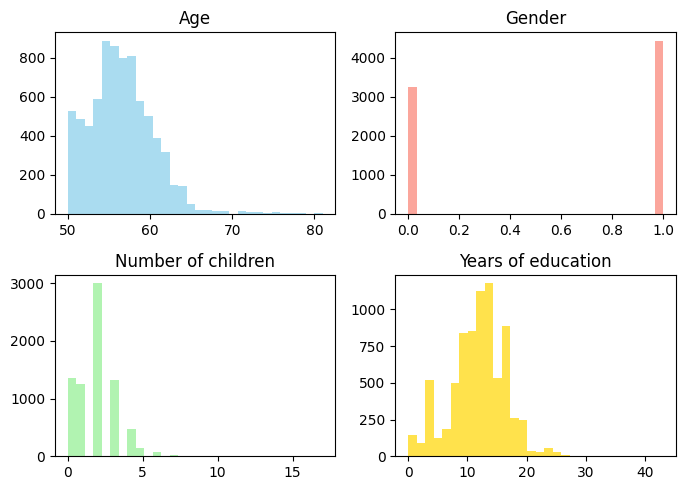


Job Status:
job_status
Private sector employee    0.74
Public sector employee     0.17
Self-employed              0.09
Name: proportion, dtype: float64

Industry of Employment:
industry
Other community                                 0.14
Manufacturing                                   0.13
Health and social work                          0.13
Education                                       0.12
Wholesale and retail trade                      0.10
Public administration and defence               0.09
Construction                                    0.07
Agriculture, hunting, forestry, fishing         0.06
Transport, storage and communication            0.05
Hotels and restaurants                          0.04
Financial intermediation                        0.03
Real estate, renting and business activities    0.02
Electricity, gas and water supply               0.02
Other                                           0.01
Mining and quarrying                            0.01
Name: proportion, 

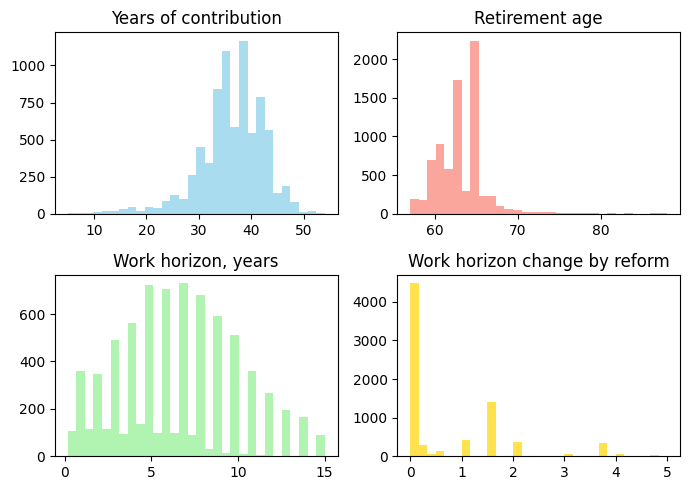


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.37
1       0           0.29
0       1           0.28
1       1           0.05
0       Refusal     0.00
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.76
1    0.24
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     1717
1.0     1687
2.0     1405
3.0     1026
4.0      729
5.0      488
6.0      279
7.0      173
8.0       80
9.0       55
10.0      31
11.0       3
12.0       2
Name: count, dtype: int64


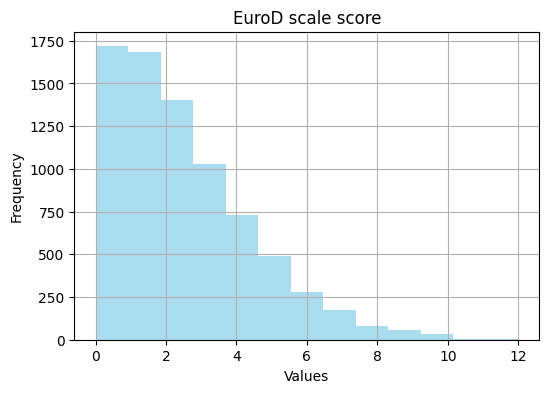


Working Conditions:
       jqi_monthly_earnings_pure  jqi_skills_discretion_pure  \
count                    7675.00                     7675.00   
mean                     1543.21                       57.89   
std                       498.16                       14.01   
min                       307.61                        5.41   
25%                      1236.80                       47.36   
50%                      1454.34                       56.79   
75%                      1790.11                       70.72   
max                      6766.63                       91.23   

       jqi_social_environment_pure  jqi_physical_environment_pure  \
count                      7675.00                        7675.00   
mean                         80.23                          83.30   
std                           5.32                           8.93   
min                          40.91                          30.77   
25%                          78.12                       

In [33]:
describe_data(df)

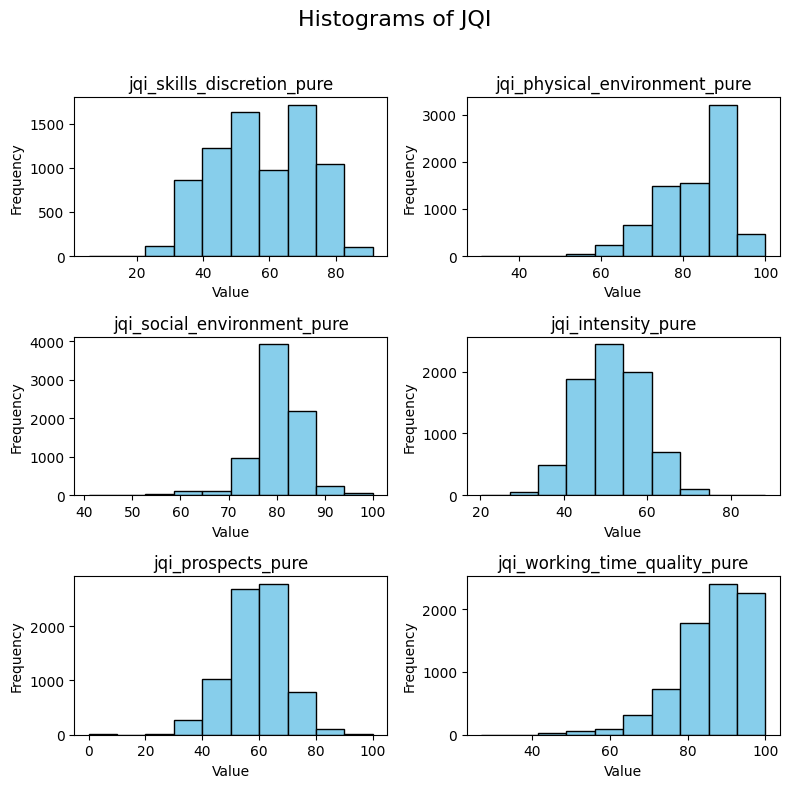

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle("Histograms of JQI", fontsize=16)

axes = axes.flatten()

for i, column in enumerate(
    df[
        [
            "jqi_skills_discretion_pure",
            "jqi_physical_environment_pure",
            "jqi_social_environment_pure",
            "jqi_intensity_pure",
            "jqi_prospects_pure",
            "jqi_working_time_quality_pure",
        ]
    ].columns
):
    axes[i].hist(df[column], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()